## language modelling  using probability 

In [1]:
import os
import email
import pandas as pd 
import numpy as np
import gc
from os import path
import tensorflow as tf
from datetime import datetime
import pickle
from IPython.display import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from nltk.tokenize import sent_tokenize
from nltk.translate.bleu_score import sentence_bleu
from sklearn.utils import shuffle
import nltk
import random
from statistics import mean, median, stdev
from multiprocessing import Pool
from nltk.corpus import reuters



In [2]:
df=pd.read_csv('emails.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.shape

(5728, 2)

In [5]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
df['text_list']=df.text.apply(lambda x: x.split())

In [7]:
df.head()

,text,spam,text_list
0,Subject: naturally irresistible your corporate...,1,"[Subject:, naturally, irresistible, your, corp..."
1,Subject: the stock trading gunslinger fanny i...,1,"[Subject:, the, stock, trading, gunslinger, fa..."
2,Subject: unbelievable new homes made easy im ...,1,"[Subject:, unbelievable, new, homes, made, eas..."
3,Subject: 4 color printing special request add...,1,"[Subject:, 4, color, printing, special, reques..."
4,"Subject: do not have money , get software cds ...",1,"[Subject:, do, not, have, money, ,, get, softw..."


In [8]:
df=df[['text','text_list','spam']]

In [9]:
df.head()

,text,text_list,spam
0,Subject: naturally irresistible your corporate...,"[Subject:, naturally, irresistible, your, corp...",1
1,Subject: the stock trading gunslinger fanny i...,"[Subject:, the, stock, trading, gunslinger, fa...",1
2,Subject: unbelievable new homes made easy im ...,"[Subject:, unbelievable, new, homes, made, eas...",1
3,Subject: 4 color printing special request add...,"[Subject:, 4, color, printing, special, reques...",1
4,"Subject: do not have money , get software cds ...","[Subject:, do, not, have, money, ,, get, softw...",1


In [10]:
### removing the word subject from each row

df['text'] = df['text'].str.replace(r'\bSubject:\b:?', '', regex=True).str.strip()

# Remove the word 'Subject' from each list in 'text_list'
#df['text_list'] = df['text_list'].apply(lambda lst: [word for word in lst if word.lower() != 'subject'])


df.head()

,text,text_list,spam
0,Subject: naturally irresistible your corporate...,"[Subject:, naturally, irresistible, your, corp...",1
1,Subject: the stock trading gunslinger fanny i...,"[Subject:, the, stock, trading, gunslinger, fa...",1
2,Subject: unbelievable new homes made easy im ...,"[Subject:, unbelievable, new, homes, made, eas...",1
3,Subject: 4 color printing special request add...,"[Subject:, 4, color, printing, special, reques...",1
4,"Subject: do not have money , get software cds ...","[Subject:, do, not, have, money, ,, get, softw...",1


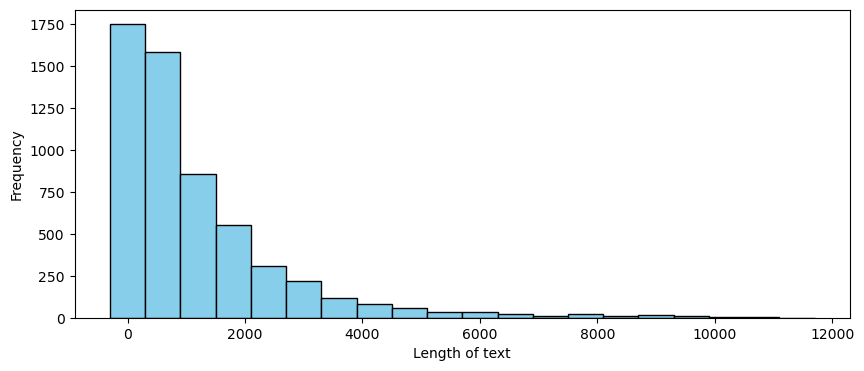

In [11]:
## lenth of each emails
import matplotlib.pyplot as plt
if __name__ == "__main__":
    # EDA for text length
    x = list(df['text'].apply(lambda x: len(x)))
    
    # Setting the figure size
    plt.rcParams["figure.figsize"] = (10, 4)
    
    # Plotting the histogram
    plt.hist(x, range=[1, 12000], bins=20, align='left', color='skyblue', edgecolor='black')
    
    # Labeling the axes
    plt.xlabel("Length of text")
    plt.ylabel("Frequency")
    
    # Display the plot
    plt.show()


* most of the people are write the short emails \
* even very less people are writing a very long email of wrods more than 10000\

### world cloud representation 

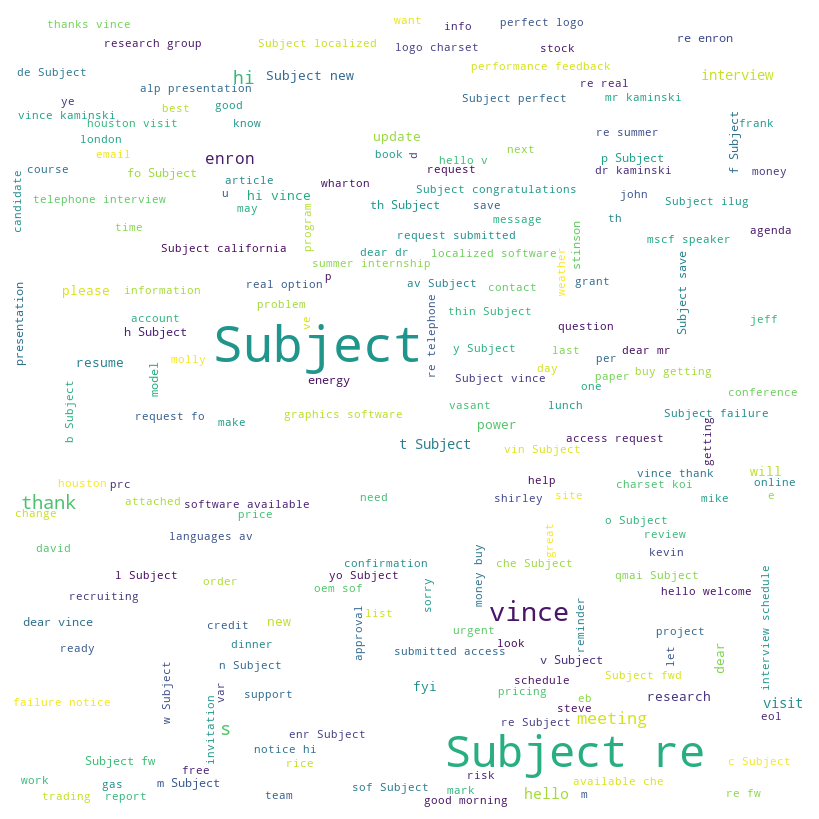

In [14]:
from wordcloud import WordCloud, STOPWORDS

#'df' is your DataFrame and 'text' is the column with the text data

# Create the word cloud
wordcloud = WordCloud(
    width=800, 
    height=800,
    background_color='white',
    stopwords=STOPWORDS,
    max_font_size=50,
    min_font_size=10
).generate(df['text'].to_string())

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### most frequent words

In [16]:
# most frequent word

def word_count(input_str):
    """Function that takes a string and counts each word in the string."""
    counts = {}  # Initialize an empty dictionary to hold word counts
    words = input_str.split()  # Split the string into words
    
    for word in words:
        if word in counts:
            counts[word] += 1  # Increment count if the word is already in the dictionary
        elif len(word) > 2:
            counts[word] = 1  # Add the word to the dictionary if its length is greater than 2
    
    return counts  # Return the dictionary of word counts



In [17]:
if __name__ == "__main__":

    # Count the most frequent words in the content
    most_frequent_words = Counter(word_count(str(df['text'].to_string()))).most_common(100)

    # Print the most frequent words
    print('\n'.join(f"{word}: {count}" for word, count in most_frequent_words))
    
    # Clean up
    most_frequent_words = None
    import gc
    gc.collect()


Subject:: 5728
...: 1294
vince: 676
the: 564
for: 539
your: 393
you: 342
and: 290
enron: 271
dear: 208
hello: 198
this: 195
thanks: 161
with: 158
from: 155
interview: 147
meeting: 144
new: 143
all: 131
visit: 127
research: 124
please: 120
are: 115
request: 110
energy: 107
software: 104
model: 100
2000: 98
have: 95
conference: 95
a...: 94
kaminski: 93
t...: 89
resume: 86
get: 84
2001: 83
risk: 82
summer: 81
,...: 80
save: 78
update: 78
houston: 76
here: 75
fyi: 75
power: 74
how: 72
-...: 72
presentation: 71
business: 70
access: 68
credit: 67
good: 67
thank: 67
i...: 66
money: 63
schedule: 56
shirley: 56
will: 55
stinson: 55
var: 55
f...: 54
logo: 54
v...: 54
information: 52
p...: 52
m...: 52
fo...: 52
our: 51
th...: 51
real: 50
mail: 50
welcome: 49
h...: 49
options: 48
can: 47
london: 47
wharton: 46
project: 46
getting: 45
congratulations: 44
would: 43
y...: 43
seminar: 43
john: 43
year: 42
free: 41
know: 41
s...: 41
approval: 41
info: 41
may: 41
want: 40
time: 40
more: 40
fwd: 40
book:

### train_test split

In [19]:
# Shuffle the DataFrame
shuffle_df = df.sample(frac=1, random_state=42)

# Define a size for your train set
train_size = int(0.7 * len(df))

# Split your dataset
train_set = shuffle_df[:train_size]
train_set.reset_index(inplace=True, drop=True)

test_set = shuffle_df[train_size:]
test_set.reset_index(inplace=True, drop=True)


### next word prediction

In [21]:
df=train_set.copy()
df.head()

,text,text_list,spam
0,Subject: re : energy derivatives conference - ...,"[Subject:, re, :, energy, derivatives, confere...",0
1,"Subject: financial maths course , part 2 vinc...","[Subject:, financial, maths, course, ,, part, ...",0
2,Subject: re : bullet points please respond to...,"[Subject:, re, :, bullet, points, please, resp...",0
3,"Subject: re : enron default swaps darrell , ...","[Subject:, re, :, enron, default, swaps, darre...",0
4,"Subject: re : power question steve , elena c...","[Subject:, re, :, power, question, steve, ,, e...",0


In [22]:
corpus=df['text_list'].to_list()

### creating a bigram model

In [24]:
from collections import defaultdict
from nltk import bigrams

def build_bigram_model(df):
    """Create a bigram model from the given DataFrame."""
    # Create a placeholder for the bigram model
    bigram_model = defaultdict(lambda: defaultdict(lambda: 0))

    # Iterate through each sentence in the DataFrame's 'content' column
    for sentence in df['text']:
        # Split the sentence into words
        words = sentence.split()

        # Count frequency of bigrams
        for w1, w2 in bigrams(words, pad_right=True, pad_left=True):
            bigram_model[w1][w2] += 1

    # Transform counts to probabilities
    for w1 in bigram_model:
        total_count = float(sum(bigram_model[w1].values()))
        for w2 in bigram_model[w1]:
            bigram_model[w1][w2] /= total_count

    return bigram_model


In [25]:
bigram=build_bigram_model(df)

In [109]:
def get_next_word(model, input_string):
    """Predict the next word based on the input string using the bigram model."""
    # Split the input string into words
    input_words = input_string.split()

    # Check if there are enough words in the input to form a bigram
    if len(input_words) > 1:
        # Get the last two words to form a bigram
        last_bigram = tuple(input_words[-2:])
        output = dict(model[last_bigram])
    else:
        # If not enough words, use the first word as the context
        output = dict(model.get(input_words[0], {}))

    # Sort the output dictionary by frequency and get the most common next word
    sorted_output = sorted(output.items(), key=lambda item: item[1], reverse=True)
    
    # Return the next word or a message if no prediction is available
    if sorted_output:
        next_word = sorted_output[0][0]
        return f"{input_string} {next_word}"
    else:
        return f"No prediction available for '{input_string}'."



In [27]:
get_next_word(bigram,'how')

'how to'

In [28]:
get_next_word(bigram,'they')

'they are'

In [29]:
get_next_word(bigram,'what')

'what is'

In [30]:
get_next_word(bigram,'love')

'love to'

### creating a trigram model

In [32]:
from collections import defaultdict
from nltk import trigrams

def build_model(df):
    """Create a trigram model from the given DataFrame."""
    # Create a placeholder for the trigram model
    trigram_model = defaultdict(lambda: defaultdict(lambda: 0))

    # Iterate through each sentence in the DataFrame's 'content' column
    for sentence in df['text']:
        # Split the sentence into words
        words = sentence.split()

        # Count frequency of trigrams
        for w1, w2, w3 in trigrams(words, pad_right=True, pad_left=True):
            trigram_model[(w1, w2)][w3] += 1

    # Transform counts to probabilities
    for (w1, w2) in trigram_model:
        total_count = float(sum(trigram_model[(w1, w2)].values()))
        for w3 in trigram_model[(w1, w2)]:
            trigram_model[(w1, w2)][w3] /= total_count

    return trigram_model

In [33]:
trigram=build_model(df)

In [34]:
get_next_word(trigram,'i may')

'i may have'

In [35]:
get_next_word(trigram,'i should')

'i should be'

In [36]:
get_next_word(trigram,'you are')

'you are not'

In [37]:
get_next_word(trigram,'i love')

'i love both'

In [38]:
get_next_word(trigram,'i love both')

'i love both italian'

In [39]:
get_next_word(trigram,'i love both italian')

'i love both italian or'

In [40]:
get_next_word(trigram,'i love both italian or')

'i love both italian or steak'

### perplexity

In [54]:
def perplexity(model, input_sentence, n_gram):
    tokenized_sentence = input_sentence.split()
    N = len(tokenized_sentence)

    if n_gram == 2:  # Bigram
        tokenized_sentence.insert(0, None)  # Start of sentence
        tokenized_sentence.append(None)      # End of sentence
        prob = []
        for i in range(len(tokenized_sentence) - 1):
            w1, w2 = tokenized_sentence[i], tokenized_sentence[i + 1]
            prob_w2_given_w1 = model[w1].get(w2, 0.0001)  # Small epsilon for unknowns
            prob.append(prob_w2_given_w1)

        perplexity_value = np.exp(-1 / N * sum(np.log(prob)))
        return perplexity_value
    
    elif n_gram == 3:  # Trigram
        tokenized_sentence.insert(0, None)  # Start of sentence
        tokenized_sentence.insert(0, None)  # Second start for trigram
        tokenized_sentence.append(None)      # End of sentence
        prob = []
        for i in range(len(tokenized_sentence) - 2):
            w1, w2, w3 = tokenized_sentence[i], tokenized_sentence[i + 1], tokenized_sentence[i + 2]
            prob_w3_given_w1_w2 = model[(w1, w2)].get(w3, 0.0001)  # Small epsilon for unknowns
            prob.append(prob_w3_given_w1_w2)

        perplexity_value = np.exp(-1 / N * sum(np.log(prob)))
        return perplexity_value

    else:
        raise ValueError("n_gram must be either 2 (bigram) or 3 (trigram).")



In [60]:
import pandas as pd

# Initialize the dictionary to store perplexity results
perplexity_dict = {
    'text': [],
    'bi-gram_score': [],
    'tri-gram_score': []
}

# Loop through each row in the DataFrame
for i in range(len(test_set)):
    try:
        body = test_set['text'][i]  # Access the text of the i-th entry
        # Calculate perplexity for trigram and bigram
        tri_gram = perplexity(trigram, body,3)
        bi_gram = perplexity(bigram, body,2)

        # Append results to the dictionary
        perplexity_dict['text'].append(body)
        perplexity_dict['bi-gram_score'].append(bi_gram)
        perplexity_dict['tri-gram_score'].append(tri_gram)

    except Exception as e:
        # In case of an error, store the text and the error message
        perplexity_dict['text'].append(body)
        perplexity_dict['bi-gram_score'].append(str(e))
        perplexity_dict['tri-gram_score'].append(str(e))

# Create a DataFrame from the perplexity results
df2 = pd.DataFrame(perplexity_dict)


df2.sample(10)


,text,bi-gram_score,tri-gram_score
1266,"Subject: contract update sheila , some minor...",65.935906,10.063119
1408,Subject: a chance to get new logo now working...,6.930623,2.580231
1233,Subject: lng meeting bjorn : the lng meeting...,81.551894,80.800690
230,"Subject: vince , here is why analytical var d...",239.744417,414.291702
1558,Subject: term project : this is the list of p...,58.200115,5.706122
142,Subject: we owe you lots of money dear homeow...,45.121105,7.922880
666,Subject: managing director and vice president ...,996.873854,3875.481264
634,Subject: need an outstanding logo now ? worki...,6.672513,2.199094
816,Subject: stox maven news - letter * * * watch...,60.381233,5.804200
1087,"Subject: re : good day , everybody will love...",408.873354,1589.685290


In [66]:
print(df2.loc[1408])


text              Subject: a chance to get new logo now  working...
bi-gram_score                                              6.930623
tri-gram_score                                             2.580231
Name: 1408, dtype: object


## smoothening of a model

### bigram smoothening

In [81]:
from collections import defaultdict
import numpy as np

def build_smoothed_bigram_model(df, alpha=1):
    # Create a placeholder for the smoothed bigram model
    bigram_model = defaultdict(lambda: defaultdict(lambda: alpha))

    # Count frequency of co-occurrence
    for sentence in df['text']:
        words = sentence.split()
        for w1, w2 in zip([None] + words, words + [None]):
            bigram_model[w1][w2] += 1

    # Convert counts to probabilities with smoothing
    for w1 in bigram_model:
        total_count = float(sum(bigram_model[w1].values()))
        for w2 in bigram_model[w1]:
            bigram_model[w1][w2] = (bigram_model[w1][w2] + alpha) / (total_count + alpha * len(bigram_model[w1]))

    return bigram_model



In [83]:
bigram=build_smoothed_bigram_model(df)

In [87]:
get_next_word(bigram,'i')

'i am'

In [95]:
get_next_word(bigram,'love')

'love to'

### trigram smoothening

In [77]:
def build_smoothed_trigram_model(df, alpha=1):
    # Create a placeholder for the smoothed trigram model
    trigram_model = defaultdict(lambda: defaultdict(lambda: alpha))

    # Count frequency of co-occurrence
    for sentence in df['text']:
        words = sentence.split()
        for w1, w2, w3 in zip([None, None] + words, [None] + words + [None], words + [None, None]):
            trigram_model[(w1, w2)][w3] += 1

    # Convert counts to probabilities with smoothing
    for w1_w2 in trigram_model:
        total_count = float(sum(trigram_model[w1_w2].values()))
        for w3 in trigram_model[w1_w2]:
            trigram_model[w1_w2][w3] = (trigram_model[w1_w2][w3] + alpha) / (total_count + alpha * len(trigram_model[w1_w2]))

    return trigram_model


In [97]:
trigram= build_smoothed_trigram_model(df)

In [105]:
get_next_word(trigram,"i love")

"No prediction available for 'i love'."